<a href="https://colab.research.google.com/github/zohaibsaleem344/Hello-world/blob/master/EDA_Assignment_DS8_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step-1: import the given file using appropriate pandas function, store it in a dataframe and read the first 3 rows.
'''IMP: There are 2 sheets in the given file i.e. App Store Games and Data Dictionary.
      Load App Store Games sheet for analysis. Pass the sheet name as an argument(sheet_name) to the function(read_excel).
      '''
appstore_df =pd.read_excel("/content/App Store Games English.xlsx",sheet_name="App Store Games")
appstore_df.head(3)

,App URL,App ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Description,Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-07-11
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-07-11
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-07-11


In [3]:
# Step-2: Check the shape of the dataset
appstore_df.shape

(17007, 16)

In [4]:
# Step-3: Check the datatype of all the columns
appstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App URL              17007 non-null  object        
 1   App ID               17007 non-null  int64         
 2   Name                 17006 non-null  object        
 3   Subtitle             5257 non-null   object        
 4   Icon URL             17007 non-null  object        
 5   Average User Rating  7561 non-null   float64       
 6   User Rating Count    7561 non-null   float64       
 7   Price per App (USD)  17007 non-null  float64       
 8   Description          16990 non-null  object        
 9   Developer            17007 non-null  object        
 10  Age Rating           17007 non-null  object        
 11  Languages            17007 non-null  object        
 12  Size in Bytes        17006 non-null  float64       
 13  Primary Genre        17007 non-

In [5]:
appstore_df.isnull()
appstore_df.isnull().sum()

,0
App URL,0
App ID,0
Name,1
Subtitle,11750
Icon URL,0
Average User Rating,9446
User Rating Count,9446
Price per App (USD),0
Description,17
Developer,0


In [6]:
appstore_df.describe(include = "object")

,App URL,Name,Subtitle,Icon URL,Description,Developer,Age Rating,Languages,Primary Genre,Genres
count,17007,17006,5257,17007,16990,17007,17007,17007,17007,17007
unique,16847,16846,5009,16847,16470,8693,4,990,21,1004
top,https://apps.apple.com/us/app/additions/id1432...,Additions,Emoji Stickers,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,How many levels can you go? How deep can you c...,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,Games,"Games, Strategy, Puzzle"
freq,2,2,14,2,11,123,11806,12527,16286,778


In [7]:
filtered_df = appstore_df[appstore_df["Subtitle"].isna() | appstore_df["Description"].isna()]
filtered_df

,App URL,App ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Description,Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-07-11
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-07-11
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-07-11
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17000,https://apps.apple.com/us/app/super-kid/id1474...,1474608803,Super kid,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"\xc7ok e\u011flenceli k\xfc\xe7\xfck oyun, biz...",Karla Abbado,4+,"EN, ZH",11404288.0,Games,"Games, Casual, Strategy",2019-08-16
17001,https://apps.apple.com/us/app/lava-island-adve...,1474611467,Lava Island Adventure,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,Som ung och modig krigare gick han in i Lava\x...,Miller Peggy,9+,"EN, ZH",21191680.0,Games,"Games, Strategy, Adventure",2019-08-31
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",2019-08-01
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",2019-08-03


In [8]:
# Step-4: Check the total no. of duplicate rows, remove them and also reset the index.
duplicates = appstore_df[appstore_df.duplicated()]
print(duplicates)
appstore_df_unique = appstore_df.drop_duplicates().reset_index(drop=True)  #dropping duplicates and reset index
print(appstore_df_unique)
appstore_df_unique.shape

                                                 App URL      App ID  \
16     https://apps.apple.com/us/app/awele-oware-manc...   289217958   
57     https://apps.apple.com/us/app/shogi-kifu/id302...   302532668   
124    https://apps.apple.com/us/app/checkers/id32102...   321026028   
235    https://apps.apple.com/us/app/bungee-stickmen-...   348741265   
481    https://apps.apple.com/us/app/10-in-1-board-ga...   405430582   
...                                                  ...         ...   
16471  https://apps.apple.com/us/app/fire-block-battl...  1459748733   
16483  https://apps.apple.com/us/app/angry-bull-attac...  1460101776   
16513  https://apps.apple.com/us/app/fire-boy-water-g...  1460730256   
16561  https://apps.apple.com/us/app/kiloton/id146259...  1462595486   
16565  https://apps.apple.com/us/app/idle-bomber-idle...  1462678041   

                                                  Name  \
16                            Awele/Oware - Mancala HD   
57                 

(16847, 16)

In [9]:
# Step-5: Check the no. of missing values in each column
appstore_df_unique.isnull()
appstore_df_unique.isnull().sum()


,0
App URL,0
App ID,0
Name,1
Subtitle,11638
Icon URL,0
Average User Rating,9359
User Rating Count,9359
Price per App (USD),0
Description,17
Developer,0


In [10]:
print(appstore_df_unique['Size in Bytes'].isnull().any())
print(appstore_df_unique.loc[:, appstore_df_unique.isnull().any(axis=0
)])

True
                            Name                        Subtitle  \
0                         Sudoku                             NaN   
1                        Reversi                             NaN   
2                        Morocco                             NaN   
3                  Sudoku (Free)                             NaN   
4                   Senet Deluxe                             NaN   
...                          ...                             ...   
16842  Stack Puzzle : Rise Tower  Blast the cubes, solve puzzle!   
16843                  EachOther                             NaN   
16844         Rabbit Vs Tortoise                             NaN   
16845                     FaTaLL                Most fun game!!!   
16846   The Three Kingdoms :Bomb                             NaN   

       Average User Rating  User Rating Count  \
0                      4.0             3553.0   
1                      3.5              284.0   
2                      3.0     

*    Based on the data frame, average user rating and user rating count are  coulmn where data imputation would be required. To do this, mean , median, min and max of all the values have been taken. Based on the calculated values, mean of ratings have been imputed.

*   Since descrition coulmn is more than 60% empty and it will have no effect on data insights , it will be dropped.

*   Byte size of one of the games was missing. Mean of byte size from the games developed by same author of same nature has been imputed.









In [11]:
size_mean = appstore_df_unique['Size in Bytes'].mode()  #one of the value in size in bytes is missing which needs imputation.
print("Size_mean:  ",size_mean)
cond_subset = (appstore_df_unique['Developer'] == "mai phung bui")
cond_subset.head(3)

Size_mean:   0    49075200.0
Name: Size in Bytes, dtype: float64


,Developer
0,False
1,False
2,False


In [13]:
# Step-6: Impute the missing values and explain your strategy for each column
average_user_rating_mean = appstore_df_unique['Average User Rating'].mean()
#appstore_df_unique['User Rating'].fillna(average_user_rating, inplace=True)
print("mean:  ",average_user_rating_mean)
average_user_rating_median = appstore_df_unique['Average User Rating'].median()
print("Median:  ",average_user_rating_median)
average_user_rating_min = appstore_df_unique['Average User Rating'].min()
print("Min:  ",average_user_rating_min)
average_user_rating_max = appstore_df_unique['Average User Rating'].max()
print("Max:  ",average_user_rating_max)
#user_count_mean = appstore_df_unique['User Rating Count'].mean()
#print("Count_mean:  ",user_count_mean)
size_mean = appstore_df_unique['Size in Bytes'].mode()
print("Size_mean:  ",size_mean)
cond_subset = (appstore_df_unique['Developer'] == "mai phung bui")
cond_subset.head(3)
byte_size_impute = 120477696  # mean of the two other games is being imputed
appstore_df_unique = appstore_df_unique.drop('Description', axis=1)
appstore_df_unique['Average User Rating'].fillna(average_user_rating_mean, inplace=True)
#appstore_df_unique['User Rating Count'].fillna(user_count_mean, inplace=True)
appstore_df_unique['Size in Bytes'].fillna(byte_size_impute, inplace=True)
appstore_df_unique.isnull().sum()
# ERROR BELOW IS DUE TO DROPPED COLUMN "DESCRIPTION" IN SUBSEQUENT CODES BELOW. I RERUN THIS CODE SNIPPET AGAIN AND THIS ERROR WAS ENCOUNTERED, HOWEVER CODE HAS WORKED FINE

mean:   4.062099358974359
Median:   4.062099358974359
Min:   1.0
Max:   5.0
Size_mean:   0    49075200.0
Name: Size in Bytes, dtype: float64


KeyError: "['Description'] not found in axis"

In [14]:
# Step-7: Sort the DataFrame by 'Size in Bytes' column in decending order
df_sorted = appstore_df_unique.sort_values(by='Size in Bytes', ascending=False)
print(appstore_df_unique)



                                                 App URL      App ID  \
0       https://apps.apple.com/us/app/sudoku/id284921427   284921427   
1      https://apps.apple.com/us/app/reversi/id284926400   284926400   
2      https://apps.apple.com/us/app/morocco/id284946595   284946595   
3      https://apps.apple.com/us/app/sudoku-free/id28...   285755462   
4      https://apps.apple.com/us/app/senet-deluxe/id2...   285831220   
...                                                  ...         ...   
16842  https://apps.apple.com/us/app/stack-puzzle-ris...  1474626442   
16843  https://apps.apple.com/us/app/eachother/id1474...  1474919257   
16844  https://apps.apple.com/us/app/rabbit-vs-tortoi...  1474962324   
16845  https://apps.apple.com/us/app/fatall/id1474963671  1474963671   
16846  https://apps.apple.com/us/app/the-three-kingdo...  1475076711   

                            Name                        Subtitle  \
0                         Sudoku                             NaN   

In [15]:
# Step-8: Create 3 new columns
# 1. 'Year' - > by extracting year from Release Date column
# HINT: df['Release Date'].dt.year

appstore_df_unique['Release Date'] = pd.to_datetime(appstore_df_unique['Release Date'])
appstore_df_unique['Year'] = appstore_df_unique['Release Date'].dt.year   # Year column based on the Release date has been added
#print(appstore_df_unique)
appstore_df_unique.head()


,App URL,App ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date,Year
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-07-11,2008
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-07-11,2008
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-07-11,2008
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2008
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2008


In [17]:
# 2. 'Paid or Free' -> using lambda function on 'Price per App (USD)' where price = 0 assign'Free' else 'Paid'.
appstore_df_unique['Paid or free'] = appstore_df_unique['Price per App (USD)'].apply(lambda price: 'Free' if price == 0 else 'Paid')
appstore_df_unique.head(3)

,App URL,App ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date,Year,Paid or free
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-07-11,2008,Paid
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-07-11,2008,Paid
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-07-11,2008,Free


In [18]:
# 3. 'Revenue' -> 'User Rating Count' * 'Price per App (USD)'
appstore_df_unique['Revenue'] = appstore_df_unique['User Rating Count'] * appstore_df_unique['Price per App (USD)']
df_sorted = appstore_df_unique.sort_values(by='Revenue', ascending=False)
df_sorted.head()

,App URL,App ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date,Year,Paid or free,Revenue
1634,https://apps.apple.com/us/app/bloons-td-5/id56...,563718995,Bloons TD 5,Top-Rated Tower Defense Game,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,97776.0,2.99,Ninja Kiwi,9+,"AR, DA, EN, FI, FR, DE, IT, JA, KO, NO, PT, RU...",133326848.0,Games,"Games, Action, Entertainment, Strategy",2012-11-15,2012,Paid,292350.24
8581,https://apps.apple.com/us/app/bloons-td-6/id11...,1118115766,Bloons TD 6,All New Epic Tower Defense,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,5.0,46634.0,4.99,Ninja Kiwi,9+,EN,163898368.0,Games,"Games, Strategy, Action, Entertainment",2018-06-14,2018,Paid,232703.66
126,https://apps.apple.com/us/app/traffic-rush/id3...,322423174,Traffic Rush,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,212763.0,0.99,Donut Games,9+,EN,9466880.0,Games,"Games, Strategy, Action",2009-07-12,2009,Paid,210635.37
1332,https://apps.apple.com/us/app/plague-inc/id525...,525818839,Plague Inc.,Can you Infect the World?,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.5,205014.0,0.99,Ndemic Creations,12+,"EN, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ES...",118793216.0,Games,"Games, Strategy, Simulation",2012-05-26,2012,Paid,202963.86
610,https://apps.apple.com/us/app/chess-tiger-pro/...,423198259,Chess Tiger Pro,Learn and play chess,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,20923.0,7.99,Christophe Th\xe9ron,4+,"EN, FR, DE",43340800.0,Games,"Games, Board, Strategy",2011-03-08,2011,Paid,167174.77


In [20]:
# Step 9: Convert the values in 'Size in Bytes' column into MB
# HINT: bytes to KB - > df['Size in Bytes']/1024
#         KB to MB - > df['Size in Bytes']/1024/1024
df_sorted['Size in Bytes'] = df_sorted['Size in Bytes']/1048576
df_sorted.head(10)
# SIZE IN BYTE HAS ALREADY BEEN CHANGED TO LOWER CASE size(mb)

,App URL,App ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date,Year,Paid or free,Revenue
1634,https://apps.apple.com/us/app/bloons-td-5/id56...,563718995,Bloons TD 5,Top-Rated Tower Defense Game,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,97776.0,2.99,Ninja Kiwi,9+,"AR, DA, EN, FI, FR, DE, IT, JA, KO, NO, PT, RU...",0.000121,Games,"Games, Action, Entertainment, Strategy",2012-11-15,2012,Paid,292350.24
8581,https://apps.apple.com/us/app/bloons-td-6/id11...,1118115766,Bloons TD 6,All New Epic Tower Defense,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,5.0,46634.0,4.99,Ninja Kiwi,9+,EN,0.000149,Games,"Games, Strategy, Action, Entertainment",2018-06-14,2018,Paid,232703.66
126,https://apps.apple.com/us/app/traffic-rush/id3...,322423174,Traffic Rush,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,212763.0,0.99,Donut Games,9+,EN,0.000009,Games,"Games, Strategy, Action",2009-07-12,2009,Paid,210635.37
1332,https://apps.apple.com/us/app/plague-inc/id525...,525818839,Plague Inc.,Can you Infect the World?,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.5,205014.0,0.99,Ndemic Creations,12+,"EN, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ES...",0.000108,Games,"Games, Strategy, Simulation",2012-05-26,2012,Paid,202963.86
610,https://apps.apple.com/us/app/chess-tiger-pro/...,423198259,Chess Tiger Pro,Learn and play chess,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,20923.0,7.99,Christophe Th\xe9ron,4+,"EN, FR, DE",0.000039,Games,"Games, Board, Strategy",2011-03-08,2011,Paid,167174.77
2610,https://apps.apple.com/us/app/finabase-realtim...,706398884,Finabase: realtime stocks,Stock Market Trade Buy Invest,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.5,1099.0,139.99,Astontek Inc,4+,EN,0.000121,Finance,"Finance, Simulation, Strategy, Games",2013-09-30,2013,Paid,153849.01
1648,https://apps.apple.com/us/app/bloons-td-5-hd/i...,566199224,Bloons TD 5 HD,Top-Rated Tower Defense Game,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.5,42652.0,2.99,Ninja Kiwi,9+,"AR, DA, EN, FI, FR, DE, IT, JA, KO, NO, PT, RU...",0.000241,Games,"Games, Entertainment, Action, Strategy",2012-12-01,2012,Paid,127529.48
104,https://apps.apple.com/us/app/towermadness/id3...,316491616,TowerMadness,Classic Defense Strategy,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.0,42389.0,2.99,Limbic Software,9+,"EN, DE",0.000051,Games,"Games, Strategy, Puzzle",2009-05-24,2009,Paid,126743.11
25,https://apps.apple.com/us/app/fieldrunners/id2...,292421271,Fieldrunners,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,41869.0,2.99,"Subatomic Studios, LLC",9+,EN,0.000068,Games,"Games, Entertainment, Action, Strategy",2008-10-05,2008,Paid,125188.31
76,https://apps.apple.com/us/app/sallys-spa/id307...,307132353,"""Sally's Spa""","Design Manage Build, have Fun!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.5,35199.0,2.99,Games Cafe Inc.,4+,"EN, FR, DE, IT, ES",0.000455,Games,"Games, Strategy, Entertainment, Action",2009-04-08,2009,Paid,105245.01


In [21]:
# Step 10: Rename the columns to lowercase and remove spaces also change 'Size in Bytes' to 'Size (MB)'
df_sorted.rename(columns={col: col.lower() for col in df_sorted.columns}, inplace=True)
df_sorted = df_sorted.rename(columns={'size in bytes': 'size (mb)'})
df_sorted.head()


,app url,app id,name,subtitle,icon url,average user rating,user rating count,price per app (usd),developer,age rating,languages,size (mb),primary genre,genres,release date,year,paid or free,revenue
1634,https://apps.apple.com/us/app/bloons-td-5/id56...,563718995,Bloons TD 5,Top-Rated Tower Defense Game,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,97776.0,2.99,Ninja Kiwi,9+,"AR, DA, EN, FI, FR, DE, IT, JA, KO, NO, PT, RU...",0.000121,Games,"Games, Action, Entertainment, Strategy",2012-11-15,2012,Paid,292350.24
8581,https://apps.apple.com/us/app/bloons-td-6/id11...,1118115766,Bloons TD 6,All New Epic Tower Defense,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,5.0,46634.0,4.99,Ninja Kiwi,9+,EN,0.000149,Games,"Games, Strategy, Action, Entertainment",2018-06-14,2018,Paid,232703.66
126,https://apps.apple.com/us/app/traffic-rush/id3...,322423174,Traffic Rush,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,212763.0,0.99,Donut Games,9+,EN,0.000009,Games,"Games, Strategy, Action",2009-07-12,2009,Paid,210635.37
1332,https://apps.apple.com/us/app/plague-inc/id525...,525818839,Plague Inc.,Can you Infect the World?,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.5,205014.0,0.99,Ndemic Creations,12+,"EN, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ES...",0.000108,Games,"Games, Strategy, Simulation",2012-05-26,2012,Paid,202963.86
610,https://apps.apple.com/us/app/chess-tiger-pro/...,423198259,Chess Tiger Pro,Learn and play chess,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,20923.0,7.99,Christophe Th\xe9ron,4+,"EN, FR, DE",0.000039,Games,"Games, Board, Strategy",2011-03-08,2011,Paid,167174.77


In [22]:
# Step 11: Creating a new column 'size_buckets' for Size Buckets using a custom function
'''HINT:
     (if size(MB) < 100)        -> 'Under 100MB'
    (if 100 <= size(MB) < 500)  -> '100 - 500MB'
    (if 500 <= size(MB) < 1024) -> '500 - 1GB'
             else               -> 'Above 1GB'''


def size_buckets(size):
  if size < 100:
    return 'Under 100MB'
  elif 100 <= size < 500:
    return '100 - 500MB'
  elif 500 <= size < 1024:
    return '500 - 1GB'
  else:
    return 'Above 1GB'

In [23]:
# Step 12: Check the value counts in each size bucket
df_sorted['size_buckets'] = df_sorted['size (mb)'].apply(size_buckets)
df_sorted['size_buckets'].value_counts()

,count
size_buckets,
Under 100MB,16847


In [24]:
# Step 13: Drop the columns not required in analysis
'''
Icon URL
Developer
App URL
Description
Languages
Genres
Release Date
Size (MB)'''
df_sorted = df_sorted.drop(['icon url', 'developer', 'app url', 'languages', 'genres', 'release date', 'size (mb)'], axis=1) # Description has already been dropped as it contained more than 60% NaNs
df_sorted.head()

,app id,name,subtitle,average user rating,user rating count,price per app (usd),age rating,primary genre,year,paid or free,revenue,size_buckets
1634,563718995,Bloons TD 5,Top-Rated Tower Defense Game,5.0,97776.0,2.99,9+,Games,2012,Paid,292350.24,Under 100MB
8581,1118115766,Bloons TD 6,All New Epic Tower Defense,5.0,46634.0,4.99,9+,Games,2018,Paid,232703.66,Under 100MB
126,322423174,Traffic Rush,NaN,3.5,212763.0,0.99,9+,Games,2009,Paid,210635.37,Under 100MB
1332,525818839,Plague Inc.,Can you Infect the World?,4.5,205014.0,0.99,12+,Games,2012,Paid,202963.86,Under 100MB
610,423198259,Chess Tiger Pro,Learn and play chess,5.0,20923.0,7.99,4+,Games,2011,Paid,167174.77,Under 100MB


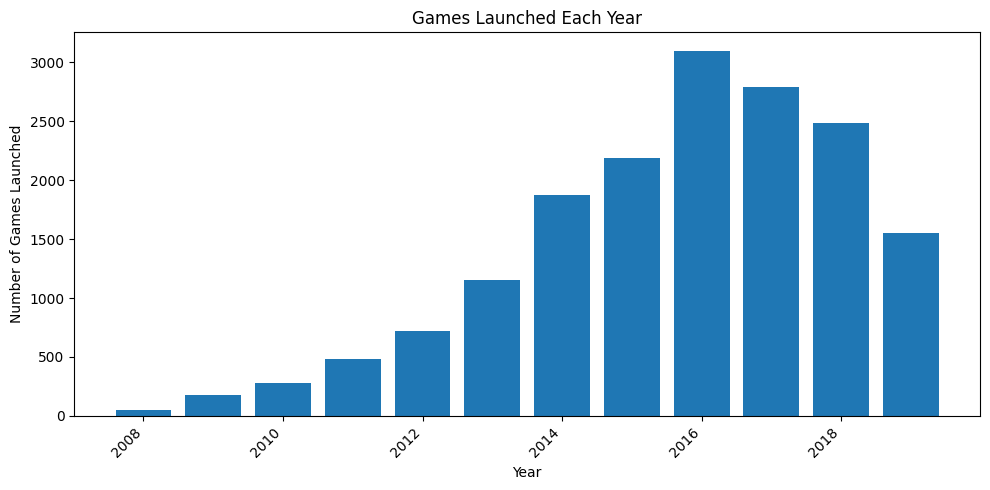

In [25]:
# Step 14: Show the no. of Games launched each year using a bar graph
#game = df_sorted['app id'].value_counts()
#year = df_sorted['year'].value_counts()
year_counts = df_sorted['year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Games Launched')
plt.title('Games Launched Each Year')
plt.xticks(rotation=45, ha='right')  # Rotated x-axis labels for better readability
plt.tight_layout()
plt.show()

year
2008     215359.20
2009    1111683.35
2010     583081.18
2011     581074.58
2012    1010605.73
2013     436088.25
2014     535319.00
2015     181122.05
2016     182297.83
2017     301396.00
2018     415600.08
2019      34996.40
Name: revenue, dtype: float64


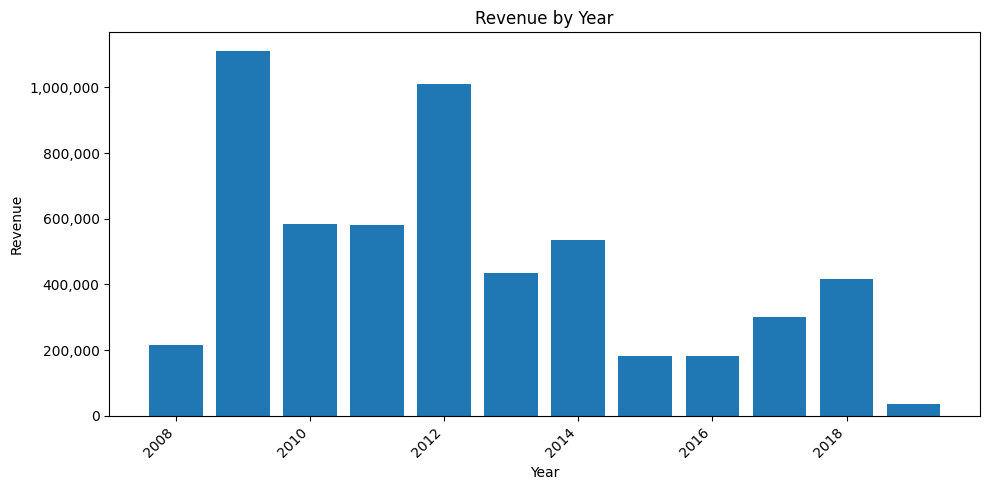

In [26]:
# Step 15: Calculate Revenue by year, save in a subset and plot using a bar graph
revenue_by_year = df_sorted.groupby('year')['revenue'].sum()
print(revenue_by_year)
plt.figure(figsize=(10, 5))
plt.bar(year_counts.index, revenue_by_year.values)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue by Year')
plt.xticks(rotation=45, ha='right')  # Rotated x-axis labels for better readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):,}')) # Without this code values on y axis were in index notation form. This line is converting it into whole numbers
plt.tight_layout()
plt.show()

In [27]:
# Step 16: Use the groupby function to show top 10 Games by Rating Count
sorted_df = df_sorted.sort_values(by='user rating count', ascending=False)
sorted_df.head(10)


,app id,name,subtitle,average user rating,user rating count,price per app (usd),age rating,primary genre,year,paid or free,revenue,size_buckets
1365,529479190,Clash of Clans,Build your empire,4.5,3032734.0,0.0,9+,Games,2012,Free,0.0,Under 100MB
7115,1053012308,Clash Royale,Epic Real-Time Card Battles!,4.5,1277095.0,0.0,9+,Games,2016,Free,0.0,Under 100MB
13285,1330123889,PUBG MOBILE,Team up! New 4v4 Mode is here,4.5,711409.0,0.0,17+,Games,2018,Free,0.0,Under 100MB
1904,597986893,Plants vs. Zombies\u2122 2,Save your brains!,4.5,469562.0,0.0,9+,Games,2013,Free,0.0,Under 100MB
8057,1094591345,Pok\xe9mon GO,Discover Pok\xe9mon worldwide,3.5,439776.0,0.0,9+,Games,2016,Free,0.0,Under 100MB
2388,672150402,Boom Beach,Build. Plan. Boom!,4.5,400787.0,0.0,9+,Games,2014,Free,0.0,Under 100MB
12360,1270598321,"Cash, Inc. Fame & Fortune Game",Fun Strategy Business Clicker!,5.0,374772.0,0.0,4+,Games,2017,Free,0.0,Under 100MB
8546,1116645064,Idle Miner Tycoon: Cash Empire,Mining Manager: Clicker Games,4.5,283035.0,0.0,4+,Games,2016,Free,0.0,Under 100MB
37,297558390,TapDefense,NaN,3.5,273687.0,0.0,9+,Games,2008,Free,0.0,Under 100MB
3514,847985808,Star Wars\u2122: Commander,Base Building Strategy Game,4.5,259030.0,0.0,9+,Games,2014,Free,0.0,Under 100MB
